## Importing Modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')

## Understanding Data

In [ ]:
df = pd.read_excel("1788410-1767134-1729261-1613779-Red_wine__(1).xlsx")
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
845,6.4,0.64,0.21,1.8,0.081,14.0,31.0,0.99689,3.52,0.66,9.8,5.0
227,9.0,0.82,0.14,2.6,0.089,9.0,23.0,0.99840,3.52,0.63,9.8,5.0
339,12.5,0.28,0.54,2.3,0.082,12.0,29.0,0.99970,3.52,1.36,9.8,7.0
891,7.2,0.66,0.03,2.3,0.078,16.0,86.0,0.99743,3.52,0.57,9.7,5.0
841,6.6,0.66,0.00,3.0,0.115,21.0,31.0,0.99629,3.52,0.63,10.3,5.0


In [ ]:
df.shape

(1599, 12)

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1598.000000,1599.000000,1598.000000,1599.000000,1599.000000,1598.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.433041,0.996747,3.498586,0.658149,10.422983,5.636421
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.876249,0.001887,0.080346,0.169507,1.065668,0.807665
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.520000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.520000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.520000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,3.900000,2.000000,14.900000,8.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1598 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1598 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1598 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


In [ ]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64

In [ ]:
df[df['total sulfur dioxide'].isna() | df['pH'].isna() | df['quality'].isna()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
9,7.5,0.50,0.36,6.1,0.071,17.0,NaN,0.9978,3.35,0.80,10.5,5.0
123,8.0,0.71,0.00,2.6,0.080,11.0,34.0,0.9976,3.44,0.53,9.5,NaN
184,6.7,0.62,0.21,1.9,0.079,8.0,62.0,0.9970,NaN,0.58,9.3,6.0


## Data Preprocessing

In [ ]:
df['pH'].fillna(df[df['quality'] == 6]['pH'].mean(), inplace=True)
df['total sulfur dioxide'].fillna(df[df['quality'] == 5]['total sulfur dioxide'].mean(), inplace=True)

In [ ]:
df.dropna(inplace=True)
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Data Visualisations

In [ ]:
df1 = df.groupby(['quality']).mean()
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3.0,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.520000,0.570000,9.955000
4.0,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.485660,0.596415,10.265094
5.0,8.167500,0.576846,0.244044,2.528750,0.092754,16.992647,56.480118,0.997103,3.485147,0.621103,9.900294
6.0,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.508100,0.675329,10.629519
7.0,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.514774,0.741256,11.465913
8.0,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.520000,0.767778,12.094444


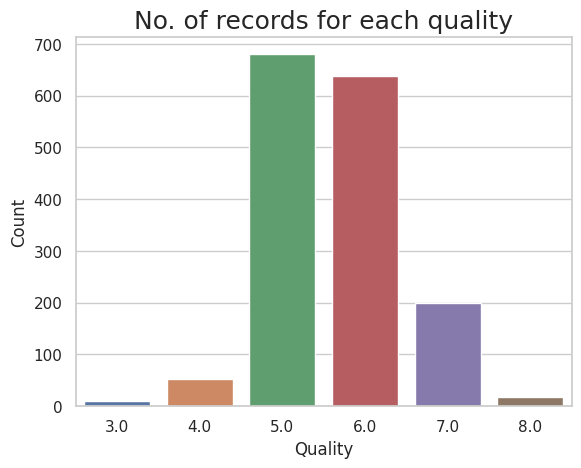

In [ ]:
df_gp = df.groupby(['quality']).count()

sns.set(style="whitegrid")  # Optional, to set a white grid background
sns.barplot(x=df_gp.index, y=df_gp['pH'])

# Add labels and title
plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('No. of records for each quality', fontsize=18)

plt.show()


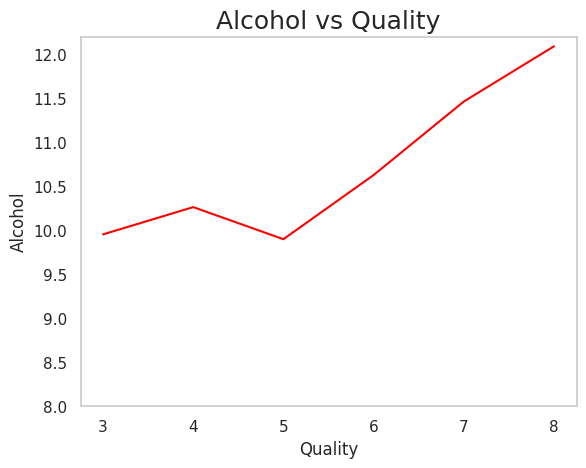

In [ ]:
plt.plot(df1.index, df1['alcohol'], color='red')
plt.ylim(8)
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.title("Alcohol vs Quality", fontsize=18)
plt.grid(False)

Text(0.5, 1.0, 'Box plot for each feature')

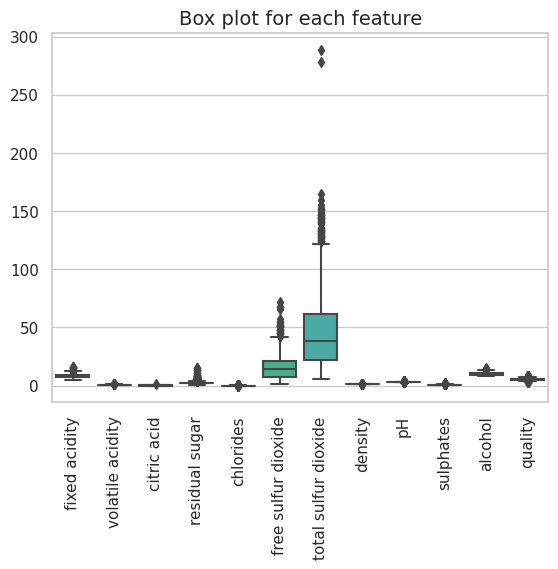

In [ ]:
sns.boxplot(df)
plt.xticks(rotation=90);
plt.title("Box plot for each feature", fontsize=14)

<Axes: >

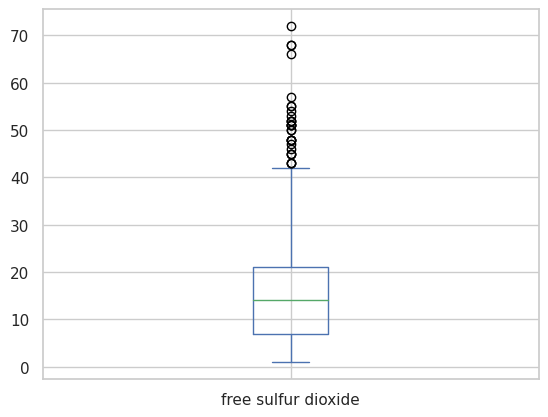

In [ ]:
df['free sulfur dioxide'].plot(kind='box')

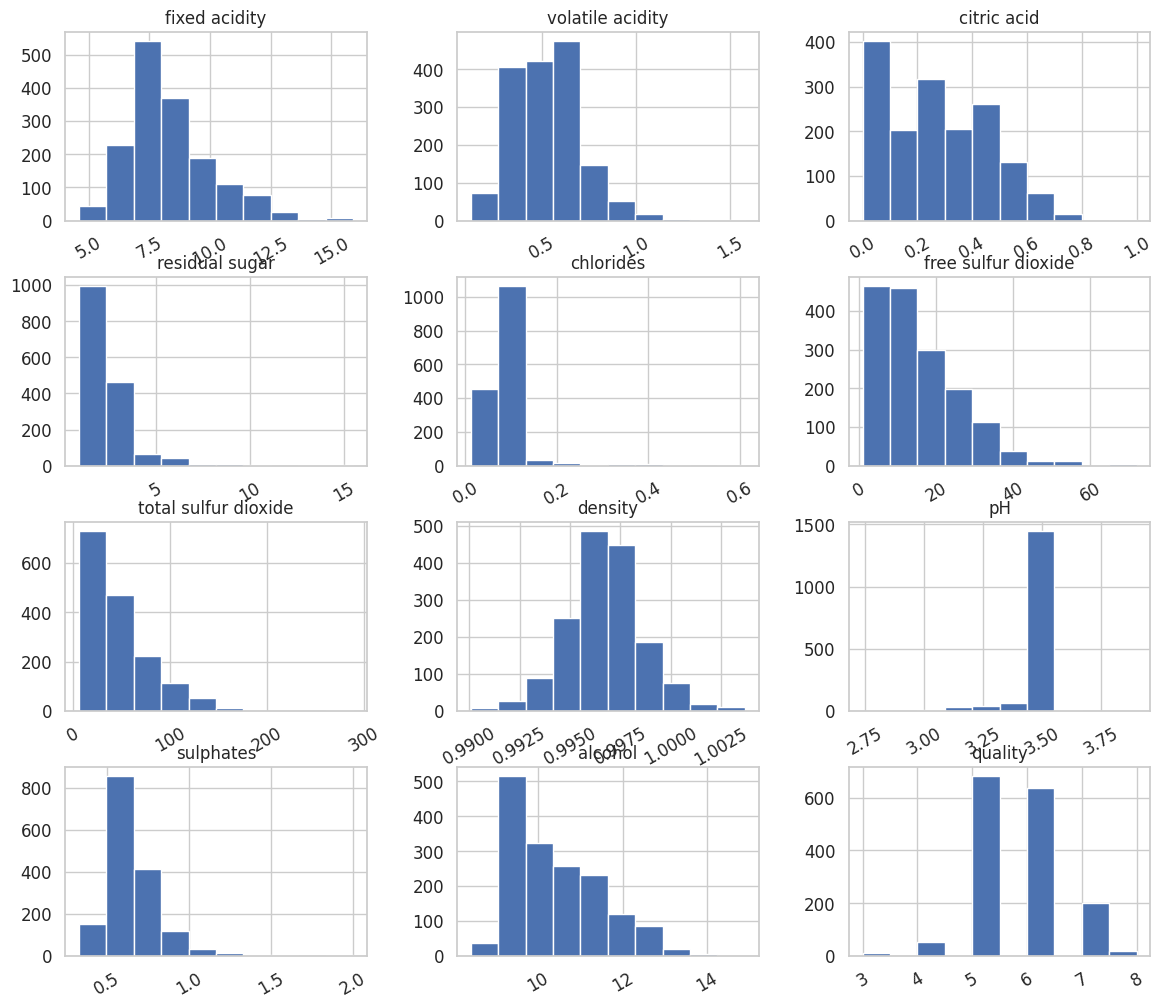

In [ ]:
df.hist(xlabelsize=12, ylabelsize=12,figsize=(14,12), xrot=30);


numpy.ndarray

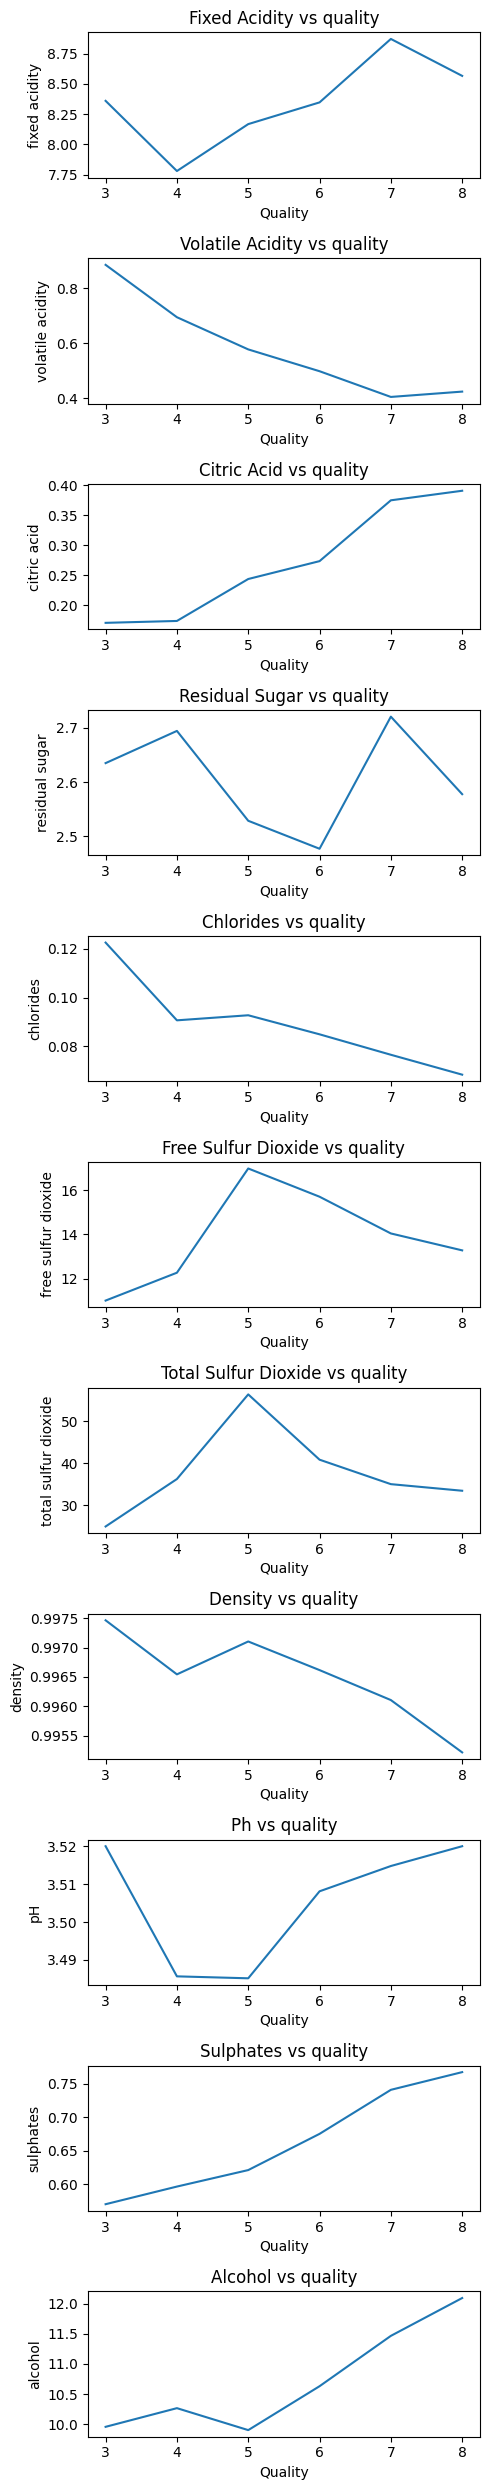

In [ ]:
fig, axs = plt.subplots(len(df1.columns), 1, figsize=(5, 25))

for i, col in enumerate(df1.columns):
  axs[i].plot(df1.index, df1[col])
  axs[i].set_title(f'{col.title()} vs quality')
  axs[i].set_xlabel('Quality')
  axs[i].set_ylabel(col)

plt.tight_layout()
plt.show()

## Spitting Data for Training and Testing

It is a classification problem where if wine quality is greater than 5 than which is *good* it's classified as 1 otherwise as 0

In [ ]:
X = df.drop(['quality'], axis=1)
y = df[['quality']]
y['quality'] = y['quality'].apply(lambda x: 0 if x < 5 else 1)

y["quality"].value_counts()

1    1535
0      63
Name: quality, dtype: int64

Data is heavily imbalanced will do something about it later

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Dataset shape : ", X_train.shape)
print("Test Dataset shape: ", X_test.shape)

Training Dataset shape :  (1278, 11)
Test Dataset shape:  (320, 11)


## ML Models


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

def get_metrics(m, X, y):
  y_pred = m.predict(X)
  cm = confusion_matrix(y, y_pred)
  print(classification_report(y, y_pred))

  sns.heatmap(cm, fmt="d", annot=True)
  plt.xlabel("Actual")
  plt.ylabel("Predicted")



### Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression


lr = LogisticRegression(max_iter=100)
lr.fit(X_train, y_train)
print("Training Score: ", lr.score(X_train, y_train))
print("Test Score: ", lr.score(X_test, y_test))

Training Score:  0.960093896713615
Test Score:  0.965625


In [ ]:
lr.coef_

array([[ 0.10448227, -3.00534581,  0.25046124, -0.19275435, -0.4327012 ,
         0.01823868,  0.0137782 , -0.08003447,  0.21200889,  0.48087216,
         0.29438083]])

Hmmm, suspiciously too accurate🙄

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.97      1.00      0.98       309

    accuracy                           0.97       320
   macro avg       0.48      0.50      0.49       320
weighted avg       0.93      0.97      0.95       320



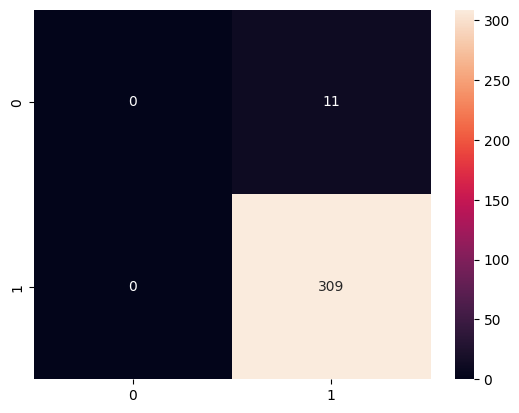

In [ ]:
get_metrics(lr, X_test, y_test)

### Dealing with Class Imbalance using SMOTE technique

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy="minority", random_state=42)


X_train1, y_train1 = smote.fit_resample(X_train, y_train)
X_test1, y_test1 = smote.fit_resample(X_test, y_test)

print(X_train1.shape)
print(y_train1['quality'].value_counts())
print(y_test1['quality'].value_counts())

(2452, 11)
1    1226
0    1226
Name: quality, dtype: int64
1    309
0    309
Name: quality, dtype: int64


Perfectly balanced now

In [ ]:
from sklearn.linear_model import LogisticRegression

lr1 = LogisticRegression()
lr1.fit(X_train1, y_train1)
print("Training Score: ", lr1.score(X_train1, y_train1))
print("Test Score: ", lr1.score(X_test1, y_test1))

Training Score:  0.7577487765089723
Test Score:  0.7944983818770227


              precision    recall  f1-score   support

           0       0.78      0.83      0.80       309
           1       0.81      0.76      0.79       309

    accuracy                           0.79       618
   macro avg       0.80      0.79      0.79       618
weighted avg       0.80      0.79      0.79       618



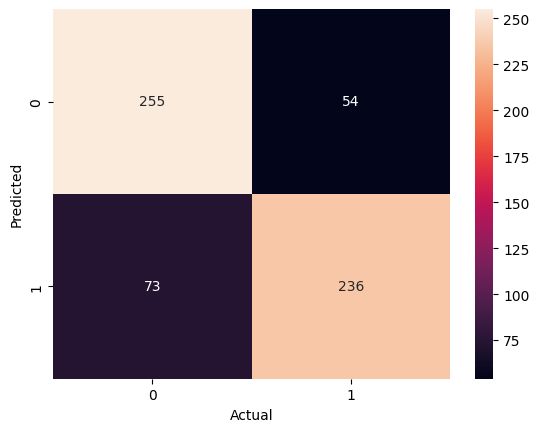

In [ ]:
get_metrics(lr1, X_test1, y_test1)

Far better!!😄

### KNeighbor Classifier

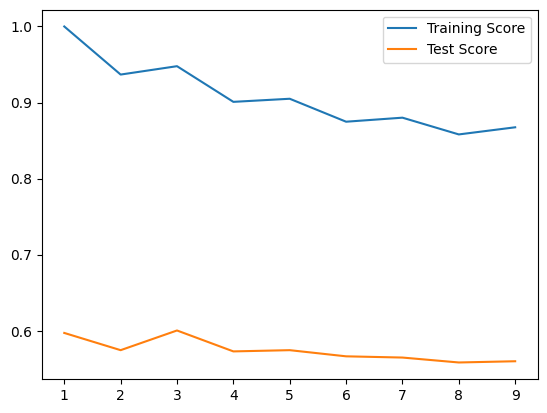

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

train_score = []
test_score = []
for i in range(1, 10):

  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train1, y_train1)
  t1_ac = knn.score(X_train1, y_train1)
  t2_ac = knn.score(X_test1, y_test1)
  train_score.append(t1_ac)
  test_score.append(t2_ac)


plt.plot(range(1,10), train_score, label="Training Score")
plt.plot(range(1,10), test_score, label="Test Score")
plt.legend()

Hmm, Not useful

### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train1, y_train1)
print("Trainin Score: ",dt.score(X_train1, y_train1))
print("Testing Score: ",dt.score(X_test1, y_test1))

Trainin Score:  0.7883360522022839
Testing Score:  0.6925566343042071


              precision    recall  f1-score   support

           0       0.68      0.73      0.70       309
           1       0.71      0.65      0.68       309

    accuracy                           0.69       618
   macro avg       0.69      0.69      0.69       618
weighted avg       0.69      0.69      0.69       618



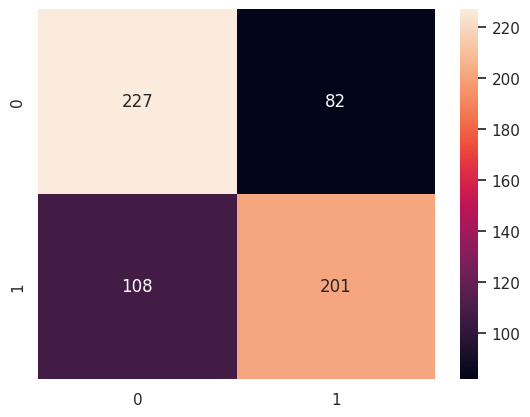

In [ ]:
get_metrics(dt, X_test1, y_test1)

### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, max_depth=3)
rf.fit(X_train1, y_train1)
print("Trainin Score: ",rf.score(X_train1, y_train1))
print("Testing Score: ",rf.score(X_test1, y_test1))

Trainin Score:  0.8262642740619902
Testing Score:  0.7621359223300971


              precision    recall  f1-score   support

           0       0.83      0.66      0.74       309
           1       0.72      0.86      0.78       309

    accuracy                           0.76       618
   macro avg       0.77      0.76      0.76       618
weighted avg       0.77      0.76      0.76       618



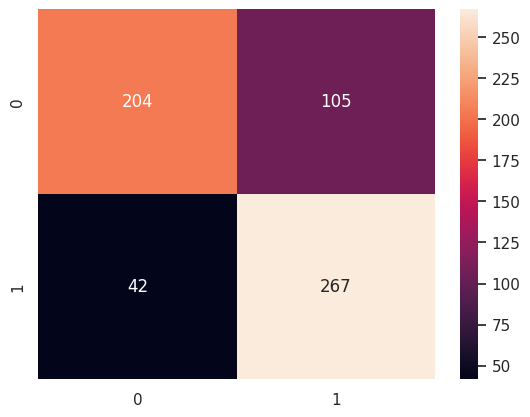

In [ ]:
get_metrics(rf, X_test1, y_test1)

# Final Model will be Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr1 = LogisticRegression()
lr1.fit(X_train1, y_train1)
print("Training Score: ", lr1.score(X_train1, y_train1))
print("Test Score: ", lr1.score(X_test1, y_test1))

Training Score:  0.7577487765089723
Test Score:  0.7944983818770227


              precision    recall  f1-score   support

           0       0.78      0.83      0.80       309
           1       0.81      0.76      0.79       309

    accuracy                           0.79       618
   macro avg       0.80      0.79      0.79       618
weighted avg       0.80      0.79      0.79       618



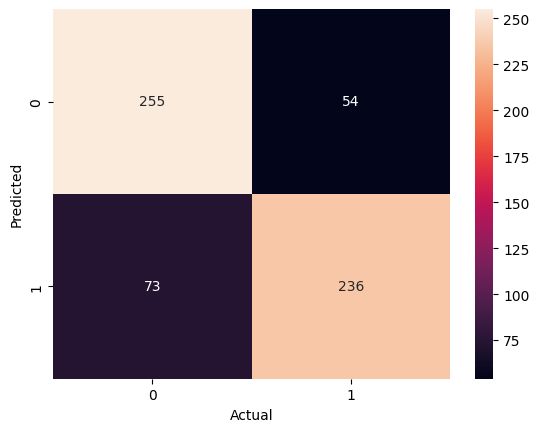

In [ ]:
get_metrics(lr1, X_test1, y_test1)